Extra Credit Assignment (up to 30 points to be added to mid-terms)
----

**Deadline**: 31 March 2016.

This is an extra credit assignment. Quesions 1-10 are worth 2 points each. Questison 11 and 12 are worth 12 points each. Points (max 30) will be added to the mid-term exam grade, but the ceiling will still be 100. Hence if you already scored 100 on the mid-terms, this extra credit assignemtn will not be necessary (You are sitll welcome to do it if you wish).

**As usual, by submitting this assignment, you agree to abide by the Duke Honor Code that the solutions are your own work.**

**Q1.** Find the longest sequence of repated letters (e.g. 'AAA') in the string below. Print 1) the index of the starting location, 2) the actual sequence.

```
TGTAGTCCATGCGGAATTCCACAGGGGCTCTGGGGACAGATTCGGACCTTTCTGTCAACGCCAATCATGGAGGTAGTGTGAGGTATAAATTTGGTCGGCGTAGGTCAAGAAAACCCACCTGCGCTGCTGTACGACACATGGCCGAGGCTTCAAGGGCATTCCACGAAGAGGCTCATGGCAACGCCTCTCGAAAGCTGGCGCTCAGGAAGGTACGATCACCCTCGAAATCAAAGATTTCATCTGAAATAAAAGTTAGTACGCCACTTTAGGGTATCGAGTACTTACCCATTTATAACGGAGGCTGAGCGAACGCTTGGCTGATGAAAAAACAACACTCGGTATAAACGGCGATTTCCACTGATCCAGGTAAAGCATGTTTGTGGATAGCAAGGGCAAGTAGTATGCAGCGAGTTTCGTGACAGTATAGCTCGACATGTATATCTCTGTGGGCGCATTTGGATGCTGTATACTGTAGAAGCAGTATATTCCCTGATGACCGAACTTACTACAAGTTGTTGTCTCGACAGGTAGTACGTGTGATCTGTGTCTGAGACCTGCAACTGGTGCGCATTGAAACTTCGTACATAAACCTACCGACTTCACCGTTTCGGCGTCGGCTTGTAACTGGAGAGTGTTGTTGCGTCATGGTCGATTGAGGATTTGGCCTAAATGTAGCGCGTATACACTGCATTATTAGCGGCTTCGAGGAACATGTAATGGGCGAGGACAGAGAATTGTATGAGATTCAAACTGCCAGGTTTTATGGCGGACCCCTGCTCCCATTGTAATCGACCGGCGGCTGGGGTACGCCCGCACGAGGGTATCGGTAGTATATCTAGCTAAGCTCCGGTGTATGCTGTTGAGACACCATTCATGCGCAAAGCCCCACCGTGCACGCATGCGATGATAAATAAGGATGACTATGGCTTACAGAGATCTTTTTCAGGGGCGTCTTGCAATAATGGTTGATAAATGTGTTTTGCCGAATCAACTGCGCGGC
```

In [15]:
s= '''TGTAGTCCATGCGGAATTCCACAGGGGCTCTGGGGACAGATTCGGACCTTTCTGTCAACGCCAATCATGGAGGTAGTGTGAGGTATAAATTTGGTCGGCGTAGGTCAAGAAAACCCACCTGCGCTGCTGTACGACACATGGCCGAGGCTTCAAGGGCATTCCACGAAGAGGCTCATGGCAACGCCTCTCGAAAGCTGGCGCTCAGGAAGGTACGATCACCCTCGAAATCAAAGATTTCATCTGAAATAAAAGTTAGTACGCCACTTTAGGGTATCGAGTACTTACCCATTTATAACGGAGGCTGAGCGAACGCTTGGCTGATGAAAAAACAACACTCGGTATAAACGGCGATTTCCACTGATCCAGGTAAAGCATGTTTGTGGATAGCAAGGGCAAGTAGTATGCAGCGAGTTTCGTGACAGTATAGCTCGACATGTATATCTCTGTGGGCGCATTTGGATGCTGTATACTGTAGAAGCAGTATATTCCCTGATGACCGAACTTACTACAAGTTGTTGTCTCGACAGGTAGTACGTGTGATCTGTGTCTGAGACCTGCAACTGGTGCGCATTGAAACTTCGTACATAAACCTACCGACTTCACCGTTTCGGCGTCGGCTTGTAACTGGAGAGTGTTGTTGCGTCATGGTCGATTGAGGATTTGGCCTAAATGTAGCGCGTATACACTGCATTATTAGCGGCTTCGAGGAACATGTAATGGGCGAGGACAGAGAATTGTATGAGATTCAAACTGCCAGGTTTTATGGCGGACCCCTGCTCCCATTGTAATCGACCGGCGGCTGGGGTACGCCCGCACGAGGGTATCGGTAGTATATCTAGCTAAGCTCCGGTGTATGCTGTTGAGACACCATTCATGCGCAAAGCCCCACCGTGCACGCATGCGATGATAAATAAGGATGACTATGGCTTACAGAGATCTTTTTCAGGGGCGTCTTGCAATAATGGTTGATAAATGTGTTTTGCCGAATCAACTGCGCGGC'''

### Solution using regular expressions

In [16]:
import re

longest = 0
seqeunce = None
for c in 'ACTG':
    m = max(re.findall(r'[%s]+' % 'A', s), key=len)
    if len(m) > longest:
        longest = len(m)
        seqeunce = m

s.index(seqeunce), seqeunce

(323, 'AAAAAA')

#### Solution without regular expressions

In [21]:
def find_seq(s, t):
    """Find the longest continuous sequence of target t in string s."""

    if t not in s:
        return (None, None, t)
    
    max_index = 0
    max_count = 0
    count = 0
    i = 0
    while i < len(s):
        char = s[i]
        if char in t:
            count +=1
        else:
            if count > max_count:
                max_count = count
                max_index = i - count
            count = 0

        i += 1
    return s[max_index:(max_index+max_count)]

In [22]:
longest = 0
seqeunce = None
for c in 'ACTG':
    m = find_seq(s, c)
    if len(m) > longest:
        longest = len(m)
        seqeunce = m

s.index(seqeunce), seqeunce

(323, 'AAAAAA')

**Q2.** Write a function that when given $m$ vectors of length $k$ and another $n$ vectos of length $k$, returns an $m \times n$ matrix of the cosine distance between each pair of vecotrs. Take the cosine distance to be 
$$
\frac{A \cdot B}{\|A\} \|B\|}
$$
for any two vectors $A$ and $B$. 

In [92]:
import scipy.linalg as la

def cosine_dist(u, v):
    """Returns cosine of angle betwwen two vectors."""
    return 1 - np.dot(u, v)/(la.norm(u)*la.norm(v))

def pdist(U, V, f):
    """Returns pairwise-distance matrix assuming U and V."""
    m = np.zeros((U.shape[0], V.shape[0]))
    for i, u in enumerate(U):
        for j, v in enumerate(V):
            m[i, j] = f(u, v)
    return m

In [93]:
u = np.random.random((4,3))
v = np.random.random((5,3))
pdist(u, v, cosine_dist)

array([[ 0.32103084,  0.27153231,  0.07224812,  0.4296358 ,  0.08300021],
       [ 0.2171661 ,  0.12360186,  0.02421176,  0.23440477,  0.20817264],
       [ 0.01971018,  0.04556457,  0.05548481,  0.09719687,  0.13431472],
       [ 0.09057264,  0.03839012,  0.0059342 ,  0.11566592,  0.18390536]])

**Q3.** For the given $x, y$ points given
```python
x = np.arange(10)
y = np.array([  1.58873597,   7.55101533,  10.71372171,   7.90123225,
                -2.05877605, -12.40257359, -28.64568712, -46.39822281,
                -68.15488905, -97.16032044])
```
Fnd the errors $\hat{y_i} - y_i$, where $\hat{y_i}$ is the least squares estimate for a qadratic polynomial fit at $x_i$. Do this by using `scipy.linalg.solve` and some suitable set of matrices and vectors.

In [95]:
x = np.arange(10)
y = np.array([  1.58873597,   7.55101533,  10.71372171,   7.90123225,
                -2.05877605, -12.40257359, -28.64568712, -46.39822281,
                -68.15488905, -97.16032044])

In [100]:
A = np.c_[np.ones(10), x, x**2]
I = np.eye(10)
xhat = la.solve(A.T@A, A.T@y)
A@xhat - y

array([ 0.96206401,  0.27337758, -1.69811458, -1.77678962,  1.20967548,
        0.4975511 ,  1.602364  ,  0.13422035, -1.41217147,  0.20782315])

**Q4.** Find the coordinates of the vector $\pmatrix{1\\ 2 \\3}$ with respect to the eigenvectors of the following matrix.
```
array([[ 0.18673654,  0.20037016,  0.47406091],
       [ 0.21715108,  0.44708353,  0.79204575],
       [ 0.24299882,  0.51936745,  0.3061621 ]])
```

In [102]:
M = np.array([[ 0.18673654,  0.20037016,  0.47406091],
       [ 0.21715108,  0.44708353,  0.79204575],
       [ 0.24299882,  0.51936745,  0.3061621 ]])

In [105]:
v = np.array([1,2,3])
w = la.solve(M, v)
w

array([ 2.6810072 ,  5.19541716, -1.14257169])

**Q5.** Find all solutions to the following system of equations:

$$\begin{eqnarray*}
x+2y-z+w &=& 2\\
3x-4y+2 w &=& 3\\
2y+z &=& 4\\
2x+2y-3z+2w&=&0\\
-2x+6y-z-w&=&-1
\end{eqnarray*}$$

Hint: Use some thougth and pencil and paper to find the number of solutions.  Then use Python to find numerical soluions if any.

In [115]:
A = np.array([[1,2,-1,1], [3,-4,0,2], [0,2,1,0], [2,2,-3,2], [-2,6,-1,-1]])
b = np.array([2,3,4,0,-1])
A

array([[ 1,  2, -1,  1],
       [ 3, -4,  0,  2],
       [ 0,  2,  1,  0],
       [ 2,  2, -3,  2],
       [-2,  6, -1, -1]])

There are 5 equations with 4 unknowns. So there will be no solutions unless $b$ is in the column space of $A$. We create the augmented matrix and find that it is consistnet after Gaussian elimination. So there is one solution. We can use least squares to find this solution.

In [130]:
x = la.solve(A.T @ A, A.T @ b)
x

array([ 1.875  ,  0.90625,  2.1875 ,  0.5    ])

In [131]:
A@x

array([ 2.,  3.,  4.,  0., -1.])

**Q6**. Let $f(x)$ be a linear transformation of $\mathbb{R}^3$ such that
$$\begin{eqnarray*}
f(e_1) &=& (1,1,3)\\
f(e_2) &=& (1,0,4)\\
f(e_3) &=& (0,2,1)
\end{eqnarray*}$$

* Find a matrix representation for $f$. 
* Compute the matrix representation for $f$ in the basis$$\begin{eqnarray*}
v_1 &=& (2,3,3)\\
v_2 &=& (8,5,2)\\
v_3 &=& (1,0,5)
\end{eqnarray*}$$

In [132]:
A = np.array([[1,1,3],[1,0,4],[0,2,1]]).T
A

array([[1, 1, 0],
       [1, 0, 2],
       [3, 4, 1]])

In [133]:
C = np.array([[2,3,3],[8,5,2],[1,0,5]]).T
C

array([[2, 8, 1],
       [3, 5, 0],
       [3, 2, 5]])

In [138]:
la.solve(C, A @ C)

array([[ 3.59493671,  4.56962025,  5.48101266],
       [-0.55696203, -0.34177215, -1.08860759],
       [ 2.26582278,  6.59493671, -1.25316456]])

**Q7.** Perform PCA on the following data using an SVD decomposition set and plot the 10 points projected onto the two largest principal compoennts. Only use routines from `numpy` and `scipy.linalg` - that is, do not use `sklearn` or `statsmodels` etc.
```python
array([[ 0.94355549,  2.7180393 ,  0.89029696,  2.8180393 ],
       [ 0.16132502,  0.77487034,  0.02602576,  0.87487034],
       [ 0.66260104,  2.14337301,  0.43904014,  2.24337301],
       [ 0.57911438,  1.87477094,  0.33537346,  1.97477094],
       [ 0.11982661,  0.76629115,  0.01435842,  0.86629115],
       [ 0.74043078,  2.57093441,  0.54823774,  2.67093441],
       [ 0.91977487,  2.48573684,  0.84598582,  2.58573684],
       [ 0.76492319,  2.08640765,  0.58510748,  2.18640765],
       [ 0.10102148,  0.55861296,  0.01020534,  0.65861296],
       [ 0.88044825,  2.67604717,  0.77518912,  2.77604717]])
``` 

In [141]:
xs = np.array([[ 0.94355549,  2.7180393 ,  0.89029696,  2.8180393 ],
       [ 0.16132502,  0.77487034,  0.02602576,  0.87487034],
       [ 0.66260104,  2.14337301,  0.43904014,  2.24337301],
       [ 0.57911438,  1.87477094,  0.33537346,  1.97477094],
       [ 0.11982661,  0.76629115,  0.01435842,  0.86629115],
       [ 0.74043078,  2.57093441,  0.54823774,  2.67093441],
       [ 0.91977487,  2.48573684,  0.84598582,  2.58573684],
       [ 0.76492319,  2.08640765,  0.58510748,  2.18640765],
       [ 0.10102148,  0.55861296,  0.01020534,  0.65861296],
       [ 0.88044825,  2.67604717,  0.77518912,  2.77604717]])

In [274]:
ws = xs - xs.mean(0)
U, s, V = la.svd(ws)

In [283]:
ys = xs @ V.T

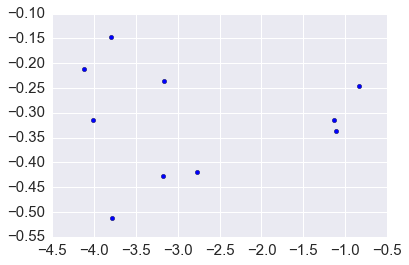

In [284]:
plt.scatter(ys[:,0], ys[:,1])
pass

#### Check

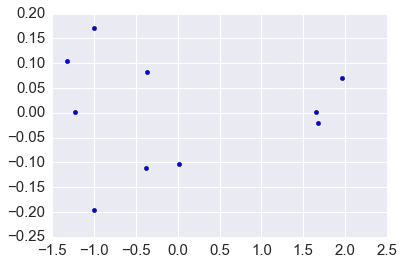

In [202]:
from sklearn.decomposition import PCA

pca = PCA()
zs = pca.fit_transform(xs)
plt.scatter(zs[:,0], zs[:,1])
pass

**Q8.** Implement a Pyhton function to find roots using the bisection method. Use it to find solutions to $x^3 + 4x^2 -3 = x$. Do not use the standard library `bisect` method - the idea is to develop the algorihtm using only basic Python langauge contructs.

In [312]:
def bisect(f, low, high, tol=1e-6):
    i = 0
    while high - low > tol:
        assert f(low) * f(high) < 0

        mid = (low + high)/2
        if f(mid) == 0:
            return mid

        if f(mid) * f(low) > 0:
            low = mid
        else:
            high = mid
    return mid

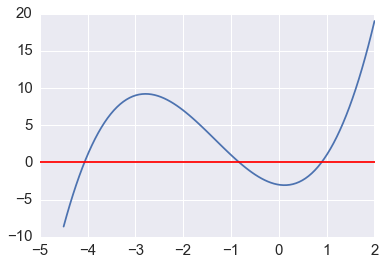

In [313]:
low, high = -4.5, 2
xs = np.linspace(low, high, 100)
plt.plot(xs, f(xs))
plt.axhline(0, c='red')
pass

In [314]:
f = lambda x: x**3 + 4*x**2 -x - 3

r1 = bisect(f, -5, -3)
r2 = bisect(f, -2, 0)
r3 = bisect(f, 0, 2)
r1, r2, r3

(-4.064435005187988, -0.827519416809082, 0.8919553756713867)

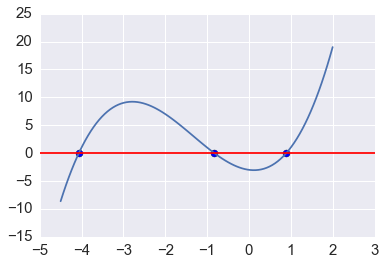

In [315]:
low, high = -4.5, 2
xs = np.linspace(low, high, 100)
plt.plot(xs, f(xs))
plt.axhline(0, c='red')
plt.scatter([r1, r2, r3], [0,0,0], s=50)
pass

**Q9.** Given the positive definite matrix

$$A = \left(\begin{matrix} 3 & 4 & 7 & 0\\
  4 &15 &11 & 3\\
  7 &11 &21 & 0\\
  0 & 3 & 0 & 1\end{matrix}\right)$$
  
Construct a basis for $\mathbb{R}^4$ that is conjugate under $A$

**Q10.** Given a positive definite matrix $A$ and some vector $b$, what is the most-efficient way to solve the equation:

$$Ax = b$$

Explain your answer by comparing the efficiency of your chosen method to the other decomposition methods we have discussed in class.

**Q11**

Implement stochastic gradient descent.  In this method, gradient descent is used essentially by fitting *one data point at a time*.  Recall the usual gradient descent step:

$$\beta_{i+1} = \beta_i - \nabla \ell(\beta_i)$$

where

$$\nabla \ell(\beta_i) = \sum\limits_{j=1}^n \nabla\ell(\beta_i,x_j,y_j)$$

and $\ell$ is the log-likelihood function.  All of the data is used to make the next step toward the optimal $\beta$.  In stochastic gradient descent, only one point at a time is used to determine the next $\beta$:

$$\beta_{i+1} = \beta_i - \alpha\nabla \ell(\beta_i,x_j,y_j)$$

where $\alpha$ is the step size.  For simplicity, we'll take a constant $\alpha=1$.

Implement the following stochastic gradient algorithm:
 
- Shuffle data points (i.e. randomly permute the order of the $(x_j,y_j)$
- Refine beta using the iterative formula above over each data point. 
- Repeat a and b until convergence is reached.

[Wikipedia](https://en.wikipedia.org/w/index.php?title=Stochastic_gradient_descent&action=edit&section=3) gives the following exmaple of how to do least squares minimization: Let's suppose we want to fit a straight line $y = \! w_1 + w_2 x$ to a training set of two-dimensional points $\! (x_1, y_1), \ldots, (x_n, y_n)$ using least squares. The objective function to be minimized is:

$$
Q(w) = \sum_{i=1}^n Q_i(w) = \sum_{i=1}^n \left(w_1 + w_2 x_i - y_i\right)^2
$$

The update step in the sttochastic gradeint descent is:

$$
\begin{bmatrix} w_1 \\ w_2 \end{bmatrix} :=
    \begin{bmatrix} w_1 \\ w_2 \end{bmatrix}
    -  \eta  \begin{bmatrix} 2 (w_1 + w_2 x_i - y_i) \\ 2 x_i(w_1 + w_2 x_i - y_i) \end{bmatrix}
$$

Implement stocahstic grdaident descent and see if you can recover the coefficients for the following data set
```python
np.random.seed(123)
x = np.linspace(0, 10, 11)
y = 3 + 6*x + np.random.normal(0, 5, 11)
```

Use $\alpha = 0.001$ and `max_iter` = 1000. Compare the answers with a model fit using the `statsmodels` package.

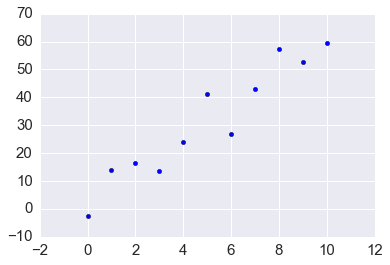

In [157]:
np.random.seed(123)
x = np.linspace(0, 10, 11)
y = 3 + 6*x + np.random.normal(0, 5, 11)
plt.scatter(x, y)
pass

In [158]:
def sgd(b, x, y, max_iter, alpha):
    for i in range(max_iter):
        n = len(y)
        idx = np.arange(n)
        np.random.shuffle(idx)    
        for j in idx:
            b[0] = b[0] - alpha * (2*(b[0] + b[1]*x[j] - y[j]))
            b[1] = b[1] - alpha * (2*x[j] * (b[0] + b[1]*x[j] - y[j]))
    return b

In [159]:
b = np.random.random(2)

In [170]:
sgd(b, x, y, 1000, 0.001)

array([ 1.96458644,  5.91389571])

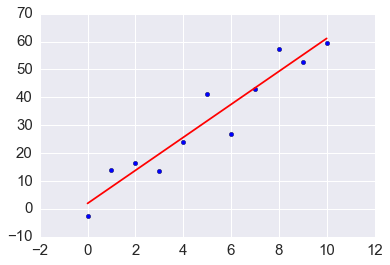

In [171]:
np.random.seed(123)
yhat = b[0] + b[1]*x 
plt.scatter(x, y)
plt.plot(x, yhat, c='red')
pass

### Check

In [163]:
df = DataFrame(dict(x=x, y=y))

In [169]:
import statsmodels.api as sm

model = sm.GLM.from_formula('y ~ x',  data=df)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                   11
Model:                            GLM   Df Residuals:                        9
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                   42.7615338601
Method:                          IRLS   Log-Likelihood:                -35.161
Date:                Wed, 23 Mar 2016   Deviance:                       384.85
Time:                        10:11:11   Pearson chi2:                     385.
No. Iterations:                     4                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.9589      3.689      0.531      0.595        -5.271     9.188
x              5.9015      0.623      9.465      0.000         4.679     7.124
==============================================================================
"""

**Q12** Write a Metropolis MCMC routine "by hand" to find the parameters of a a robust linear regression using a T distribuiton on the following data set. In other words, replicat the following analyis without using PyMC3 or PyStan.
```python
niter = 1000
with pm.Model() as robust_linreg:
    beta = pm.Normal('beta', 0, 10, shape=2)
    nu = pm.Exponential('nu', 1/len(x))
    sigma = pm.HalfCauchy('sigma', beta=1)

    y_est = beta[0] + beta[1]*x
    y_obs = pm.StudentT('y_obs', mu=y_est, sd=sigma, nu=nu, observed=y)

    step = pm.Metropolis()
    trace = pm.sample(niter, step)
```

Use the following dataset
```python
df = pd.read_csv('xy.csv')
```